# Lesson 1 Assignment: Visualize Some More Time Series
You've begun to learn about Time Series Forecasting by looking at the type of data that requires this special modeling. You've visualized some data around energy. Now, look around for some other data that would benefit from Time Series Forecasting. Find three examples (try Kaggle and Azure Open Datasets) and create a notebook to visualize them. Notate any special characteristics they have (seasonality, abrupt changes, or other trends) in the notebook.

# Visualizing Bitcoin Historical Data

## Context
Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Included here is historical bitcoin market data at 1-min intervals for select bitcoin exchanges where trading takes place. Happy (data) mining!

## About the Data
 CSV files for select bitcoin exchanges for the time period of Jan 2012 to December March 2021, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. Timestamps without any trades or activity have their data fields filled with NaNs. If a timestamp is missing, or if there are jumps, this may be because the exchange (or its API) was down, the exchange (or its API) did not exist, or some other unforeseen technical error in data reporting or gathering. All effort has been made to deduplicate entries and verify the contents are correct and complete to the best of my ability, but obviously trust at your own risk.

## Necessary Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

## Reading the CSV file of Historical Bitcoin Price

In [22]:
# Read the CSV file
df = pd.read_csv("/content/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

## Exploring the Nature of our Data

In [23]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping Null Values
There are many null values in the data, and so we need to drop them.

In [24]:
df.dropna(axis=0,inplace=True)
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Converting the 'Timestamp' column to datetime

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1970-01-01 00:00:01.325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1970-01-01 00:00:01.325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1970-01-01 00:00:01.325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1970-01-01 00:00:01.325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1970-01-01 00:00:01.325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


## Creating a line plot for Bitcoin closing price

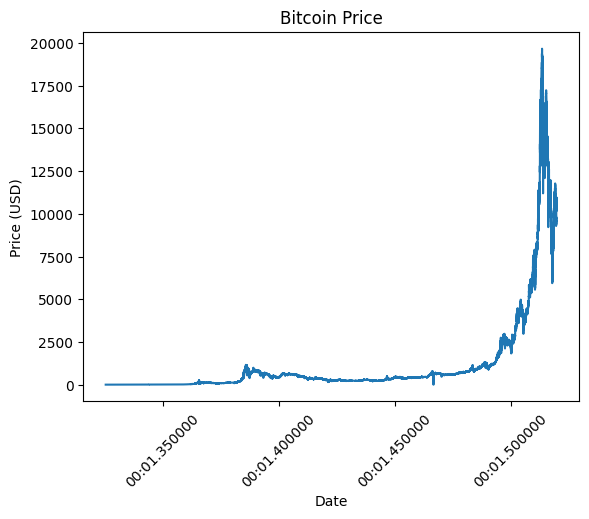

In [26]:
# Create a line plot for Bitcoin closing price
plt.plot(df['Timestamp'], df['Close'])

# Set the title and labels
plt.title('Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Rotate x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()